# **Map SalishSea**

In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import os
import sys
from matplotlib import pyplot as plt, animation, rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from cartopy import crs, feature
from datetime import datetime, timedelta
import cmocean
sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions23 import *

cmap = cmocean.cm.deep

fatal: not a git repository (or any parent up to mount point /)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


## Paths

In [2]:
# Define paths
local = 0 #Set to 0 when working on server
paths = path(local)

## Simulation

In [3]:
def make_prefix(date, path, res='h'):
    """Construct path prefix for local SalishSeaCast results given date object and paths dict
    e.g., /results2/SalishSea/nowcast-green.201905/daymonthyear/SalishSea_1h_yyyymmdd_yyyymmdd
    """

    datestr = '_'.join(np.repeat(date.strftime('%Y%m%d'), 2))
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path, f'{folder}/SalishSea_1{res}_{datestr}')
    
    return prefix
path_NEMO = make_prefix(datetime(2018, 12, 1), paths['NEMO'])


In [4]:
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])

In [5]:
U = xr.open_dataset(path_NEMO+'_grid_U.nc', decode_times=False)
V = xr.open_dataset(path_NEMO+'_grid_V.nc', decode_times=False)

In [6]:
u = U.vozocrtx
X = U.nav_lon

In [7]:
vel =  np.sqrt(V.vomecrty[0,0,:,:]**2+U.vozocrtx[0,0,:,:]**2)

In [8]:
v = V.vomecrty[0,0,:,:]
v = v.where(v != 0)
u = U.vozocrtx[0,0,:,:]
u = u.where(u != 0)

In [9]:
x= np.linspace(0,u.shape[1],u.shape[1])
y = np.linspace(0,u.shape[0],u.shape[0])

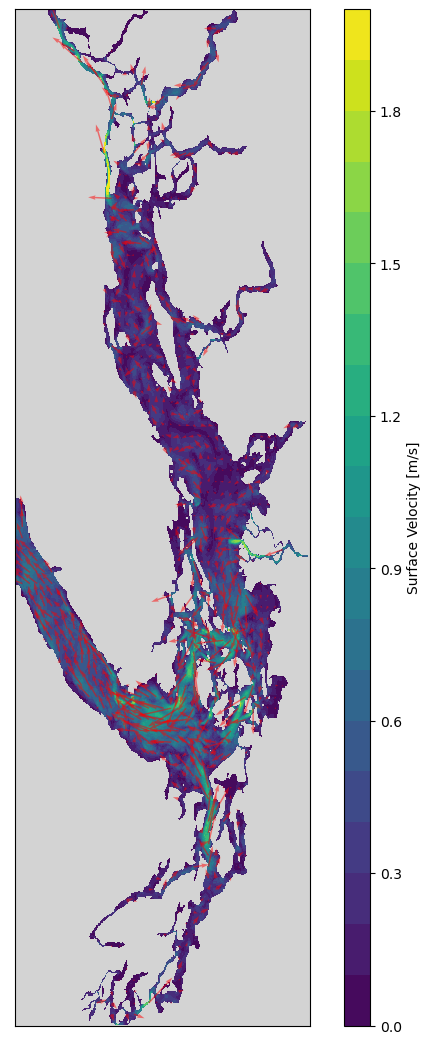

In [10]:
start = datetime(2022, 12, 1)

X,Y = np.meshgrid(x,y)
fig, ax = plt.subplots(figsize=(8.8, 13.2))

skip = dict(x=slice(None,None,10),y=slice(None,None,10))
im = ax.contourf(X,Y,vel,levels = np.linspace(0,2,21))
ax.contourf(X, Y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
plt.quiver(x[::10],y[::10],u.isel(skip),v.isel(skip),color='r',scale=10,width=0.005,alpha=0.5)
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])

#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
# ax.text(-0.09, 0.55, 'Latitude', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax.transAxes, fontsize=14)
# ax.text(0.5, -0.08, 'Longitude', va='bottom', ha='center',
#         rotation='horizontal', rotation_mode='anchor',
#         transform=ax.transAxes, fontsize=14)
f = 1.0/np.cos(49*np.pi/180)
plt.gca().set_aspect(f)
cbar = fig.colorbar(im, location='right',aspect=40,shrink=1,pad=0.05)

cbar.set_label('Surface Velocity [m/s]')

#plt.savefig("/home/jvalenti/MOAD/animations/vel.pdf")

In [11]:
X,Y = np.meshgrid(x,y)
X= U.nav_lon.where(X != 0)
Y = U.nav_lat.where(X != 0)

v = V.vomecrty[0,0,:,:]
v = v.where(v != 0)
u = U.vozocrtx[0,0,:,:]
u = u.where(u != 0)

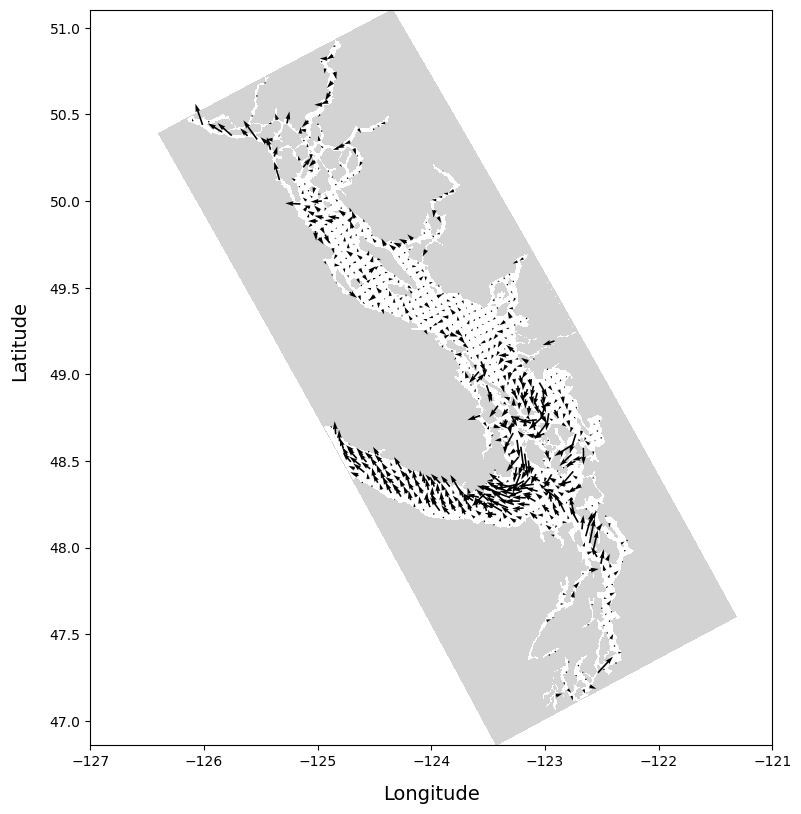

In [12]:
fig, ax = plt.subplots(figsize=(8.8, 13.2))

skip = dict(x=slice(None,None,10),y=slice(None,None,10))
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
im=plt.quiver(X.isel(skip),Y.isel(skip),u.isel(skip),v.isel(skip))
plt.xlim([-127,-121])
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
ax.text(-0.09, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14)
ax.text(0.5, -0.08, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14)
f = 1.0/np.cos(49*np.pi/180)
plt.gca().set_aspect(f)

In [13]:
WW3

NameError: name 'WW3' is not defined

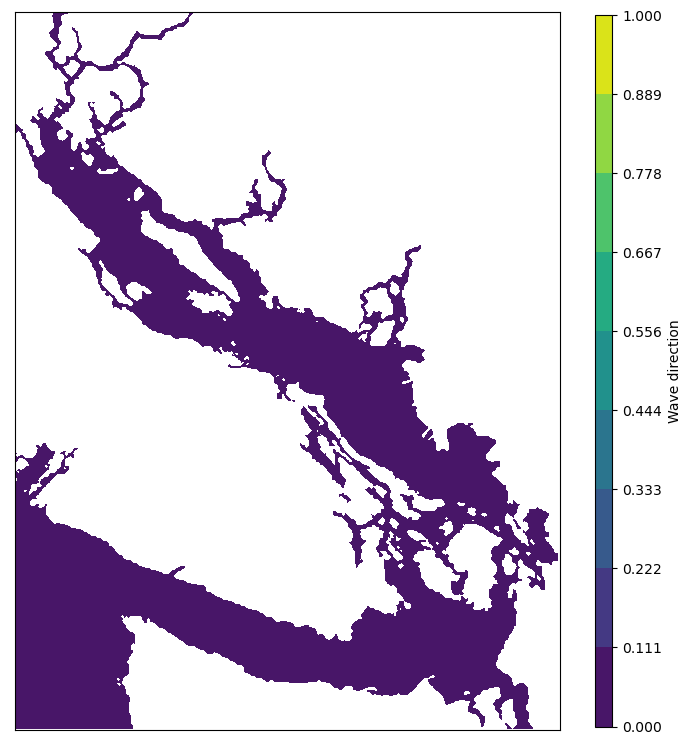

In [ ]:
start = datetime(2022, 1, 3)
WW3 = xr.open_dataset(get_WW3_path(start))
lon = WW3.longitude
lat = WW3.latitude
X,Y = np.meshgrid(lon,lat)
fig, ax = plt.subplots(figsize=(8.8, 13.2))

skip = dict(x=slice(None,None,10),y=slice(None,None,10))
im = ax.contourf(X[:550,100:510],Y[:550,100:510],WW3.wcc[12,:550,100:510],levels=np.linspace(0,1,10))

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])

#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
# ax.text(-0.09, 0.55, 'Latitude', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax.transAxes, fontsize=14)
# ax.text(0.5, -0.08, 'Longitude', va='bottom', ha='center',
#         rotation='horizontal', rotation_mode='anchor',
#         transform=ax.transAxes, fontsize=14)
f = 1.0/np.cos(49*np.pi/180)
plt.gca().set_aspect(f)
cbar = fig.colorbar(im, location='right',aspect=40,shrink=0.7,pad=0.05)

cbar.set_label('Wave direction')

#plt.savefig("/home/jvalenti/MOAD/animations/ww3.pdf")

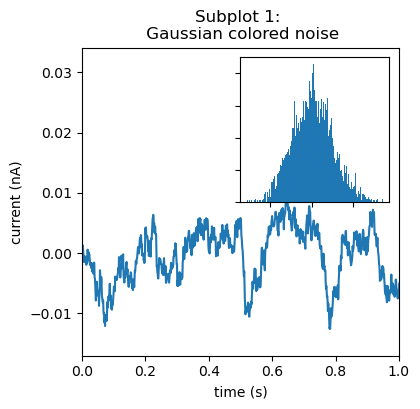

In [ ]:
# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

fig = plt.figure(figsize=(9, 4),facecolor='white')
ax = fig.add_subplot(121)
# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Subplot 1: \n Gaussian colored noise')



axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.hist(s, 400)
#plt.title('Probability')
axins.set_xticklabels('')
axins.set_yticklabels('')
plt.show()

In [ ]:
# # Make map
# blevels = list(np.arange(0,450,15))
# fig, ax = plt.subplots(figsize=(38, 16), subplot_kw={'projection': crs.Mercator()})
# ax.set_extent([-125.5, -122, 48, 50.5], crs=crs.PlateCarree())
# ax.add_feature(feature.GSHHSFeature('low', facecolor='lightgray',edgecolor='lightgray'),zorder=2)
# ax.add_feature(feature.RIVERS, edgecolor='k',zorder=5)
# #ax.add_feature(feature.OCEAN,zorder=1)
# im=ax.contourf(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:]*10,zorder=1,transform=crs.PlateCarree(),cmap=cmap,levels=blevels)
# #plt.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:]*10,zorder=1,transform=crs.PlateCarree(),colors='w',levels=blevels,linewidths=0.05)
# #plt.xticks(fontsize=14)
# #plt.yticks(fontsize=14)

# gl = ax.gridlines(
#     linestyle='--', color='gray', draw_labels=True,
#     xlocs=range(-125, -121), ylocs=range(47, 52),zorder=5)
# gl.top_labels, gl.right_labels = False, False

# cbar = fig.colorbar(im, location='bottom',aspect=60,shrink=0.3,pad=0.05)

# cbar.set_label('Depth [m]')

# ax.text(-0.05, 0.55, 'Latitude', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax.transAxes, fontsize=14,weight="bold")
# ax.text(0.5, -0.05, 'Longitude', va='bottom', ha='center',
#         rotation='horizontal', rotation_mode='anchor',
#         transform=ax.transAxes, fontsize=14,weight="bold")

# #axins = ax.inset_axes([0.65, 0.75, 0.5, 0.5],projection=crs.PlateCarree())

# ax.set_extent([-160, -75, 65, 25], crs=crs.PlateCarree())
# ax.add_feature(feature.GSHHSFeature('intermediate', edgecolor='k', facecolor='lightgray'))
# ax.add_feature(feature.BORDERS,zorder=3)
# #plt.title('Probability')
# gl = axins.gridlines(crs=crs.PlateCarree(), draw_labels=True, xlocs=np.linspace(-150,-50,5), ylocs=np.linspace(55,35,3),
#                    linewidth=2, color='gray', alpha=0.5, linestyle='--')
# gl.xlabel_style = {'size': 25}
# gl.ylabel_style = {'size': 25}
# gl.bottom_labels, gl.left_labels = False, False

# plt.show()

# #plt.savefig("/Users/jvalenti/Desktop/baty.pdf")

In [ ]:
mask

<xarray.Dataset>
Dimensions:       (y: 898, x: 398, z: 40, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/45)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
    totaldepth    (y, x) float32 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  07/08/2021 17:25:49 -0700

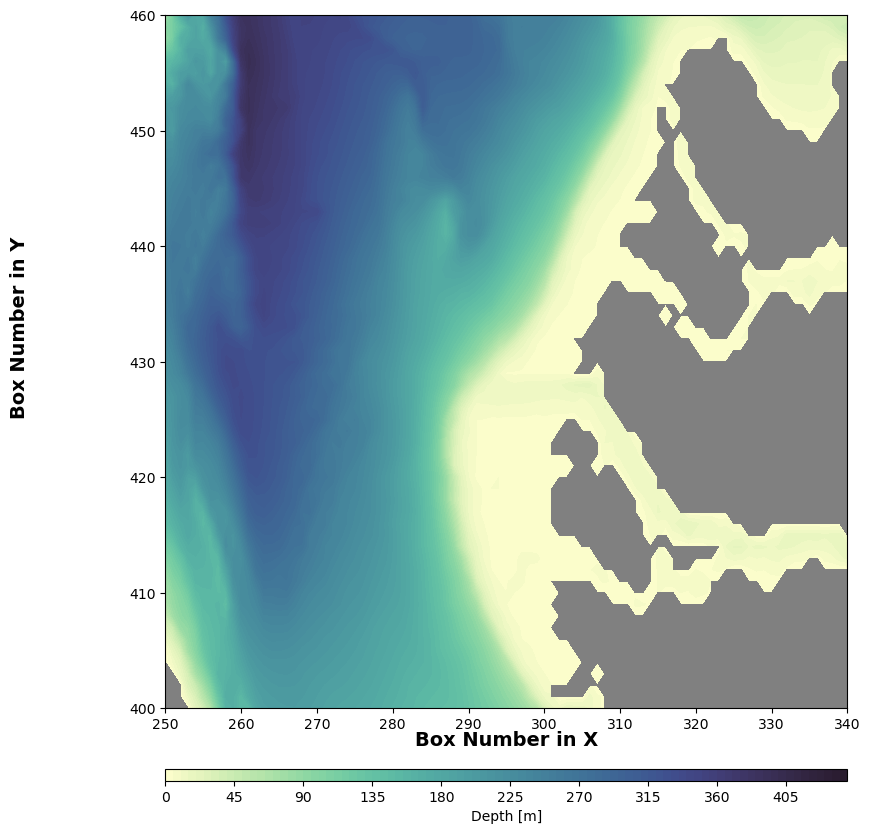

In [21]:
# Make map
blevels = list(np.arange(0,450,5))
fig, ax = plt.subplots(figsize=(8.8, 13.2))
x = np.arange(0,398)
y = np.arange(0,898)
X,Y = np.meshgrid(x,y)
#ax.add_feature(feature.GSHHSFeature('high', facecolor='#DDDDDD',edgecolor='#DDDDDD'),zorder=2)
#ax.add_feature(feature.RIVERS, edgecolor='k',zorder=5)
#ax.add_feature(feature.OCEAN,zorder=1)
im=ax.contourf(X, Y, mask.totaldepth[:,:],zorder=1,cmap=cmap,levels=blevels)
ax.contourf(X, Y, mask.umask[0,0,:,:],zorder=2,cmap='gray',levels=[-1,0])
#plt.xticks(fontsize=14),
#plt.yticks(fontsize=14)
plt.xlim([250,340])
plt.ylim([400,460])

cbar = fig.colorbar(im, location='bottom',aspect=60,shrink=1,pad=0.06)

cbar.set_label('Depth [m]')
ax.text(-0.20, 0.55, 'Box Number in Y', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")
ax.text(0.5, -0.06, 'Box Number in X', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")

f = 1.0/np.cos(49*np.pi/180)
plt.gca().set_aspect(f)

#plt.savefig("/Users/jvalenti/Desktop/domain.pdf")

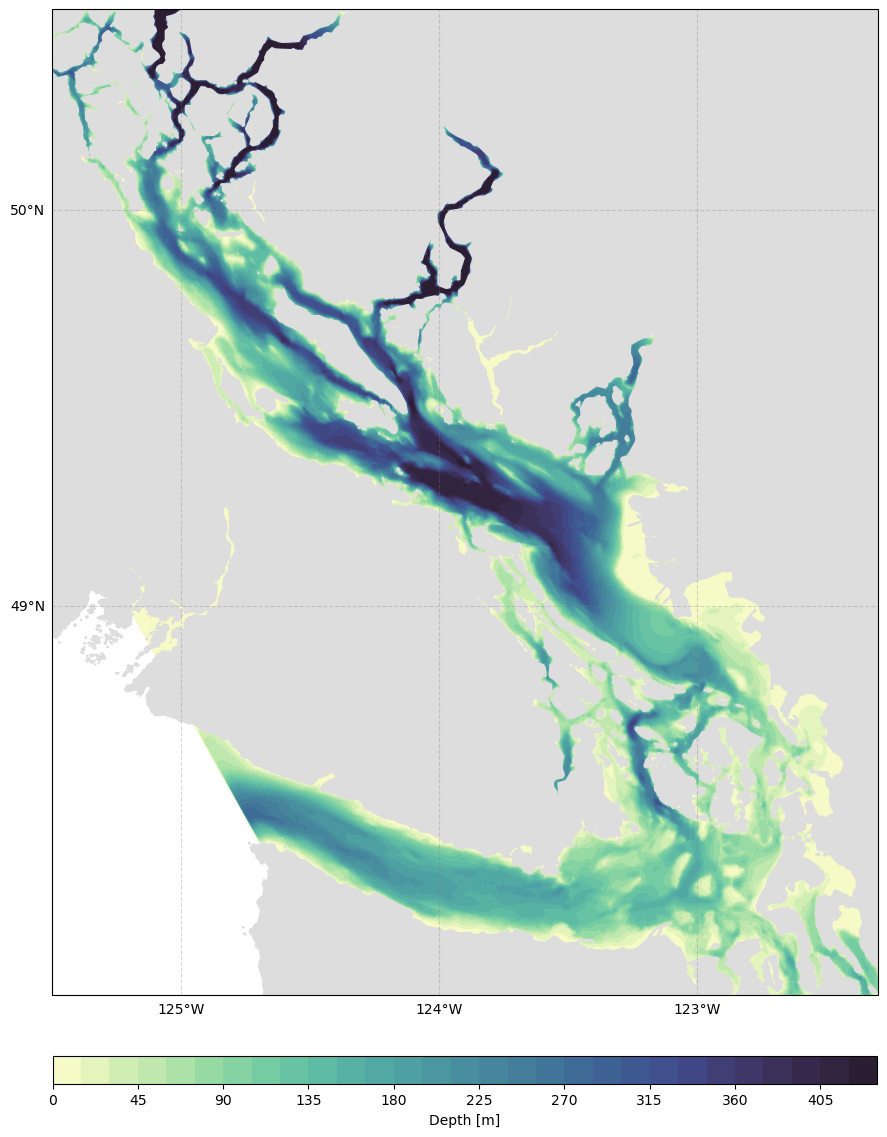

In [ ]:
# Make map
blevels = list(np.arange(0,450,15))
fig, ax = plt.subplots(figsize=(38, 16), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-125.5, -122.3, 48, 50.5], crs=crs.PlateCarree())
ax.add_feature(feature.GSHHSFeature('high', facecolor='#DDDDDD',edgecolor='#DDDDDD'),zorder=2)
#ax.add_feature(feature.RIVERS, edgecolor='k',zorder=5)
#ax.add_feature(feature.OCEAN,zorder=1)
im=ax.contourf(coords.nav_lon, coords.nav_lat, mask.totaldepth[:,:],zorder=1,transform=crs.PlateCarree(),cmap=cmap,levels=blevels)
#plt.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:]*10,zorder=1,transform=crs.PlateCarree(),colors='w',levels=blevels,linewidths=0.05)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

gl = ax.gridlines(
    linestyle='--',color='gray', draw_labels=True,
    xlocs=range(-125, -121), ylocs=range(47, 52),zorder=5,alpha=0.3)
gl.top_labels, gl.right_labels = False, False

cbar = fig.colorbar(im, location='bottom',aspect=30,shrink=0.28,pad=0.05)

cbar.set_label('Depth [m]')

# ax.text(-0.08, 0.55, 'Latitude', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax.transAxes, fontsize=14,weight="bold")
# ax.text(0.5, -0.05, 'Longitude', va='bottom', ha='center',
#         rotation='horizontal', rotation_mode='anchor',
#         transform=ax.transAxes, fontsize=14,weight="bold")

plt.savefig("/home/jvalenti/MOAD/animations/baty.pdf")

In [ ]:
states_provinces = feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jvalenti/Desktop/map.pdf'

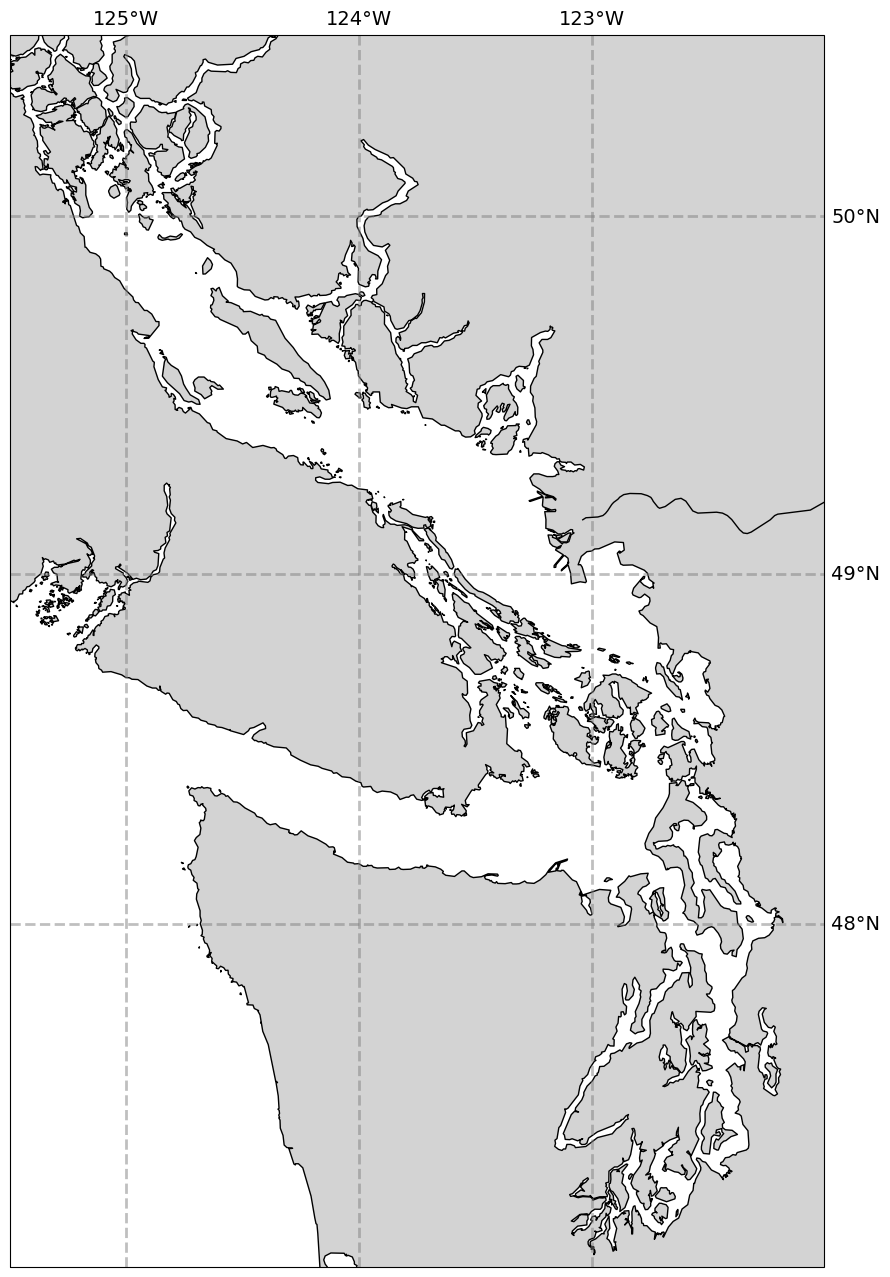

In [ ]:
# Make map
fig, ax = plt.subplots(figsize=(20, 16), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-125.5, -122, 47, 50.5], crs=crs.PlateCarree())
ax.add_feature(feature.GSHHSFeature('high', edgecolor='k', facecolor='lightgray'))
#ax.add_feature(feature.OCEAN,zorder=1)
#ax.add_feature(feature.BORDERS,zorder=3)
ax.add_feature(feature.RIVERS, edgecolor='k',zorder=5)
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, xlocs=range(-125, -121), ylocs=range(47, 52),
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
gl.bottom_labels, gl.left_labels = False, False
plt.savefig("/Users/jvalenti/Desktop/map.pdf")